# Linear Target; Variable Number of Confounds

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & = 4; \\
s & >= 0; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, a variable number of confounding features, and normally distributed noise.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = list(range(0, 21, 2))

In [5]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearWithNoiseExperiment(m=M, s=S[3], sigma=SIGMA, n=N)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


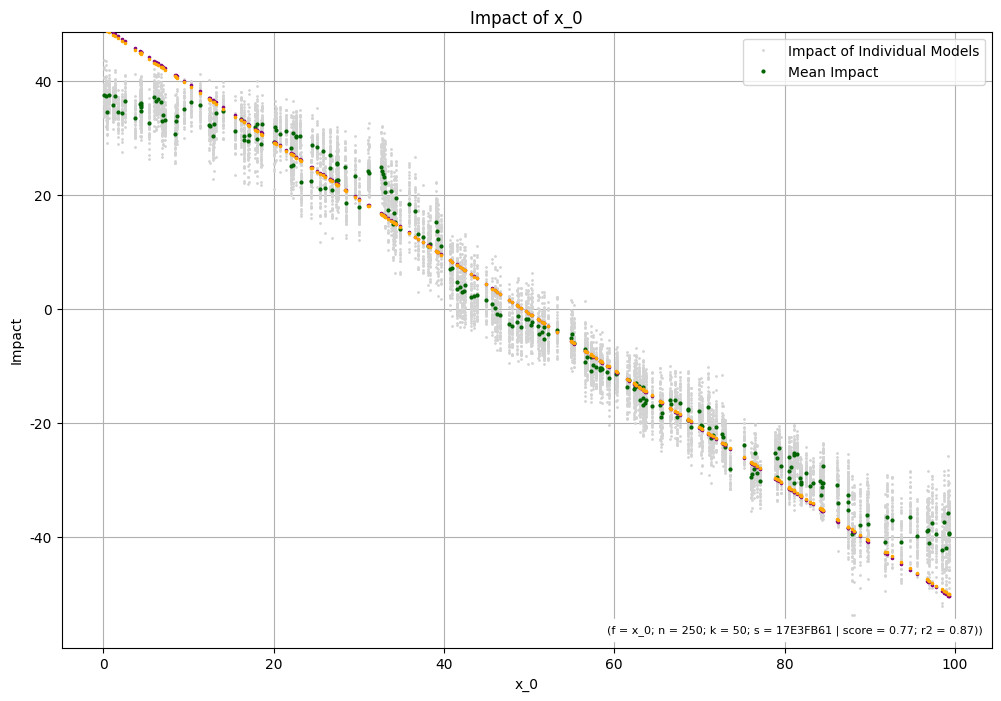

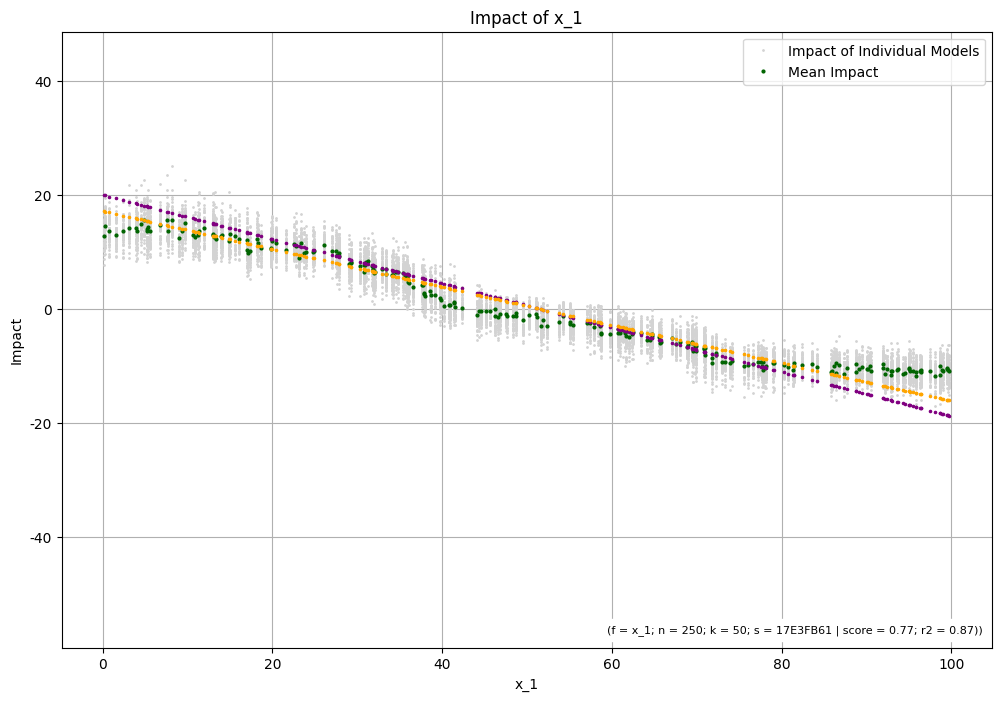

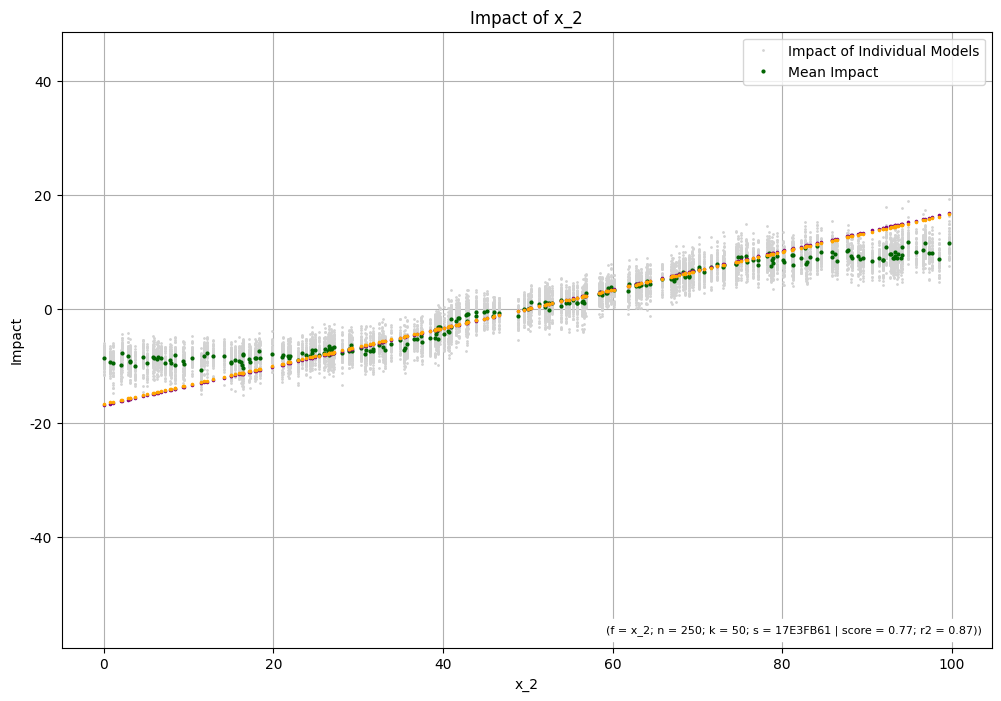

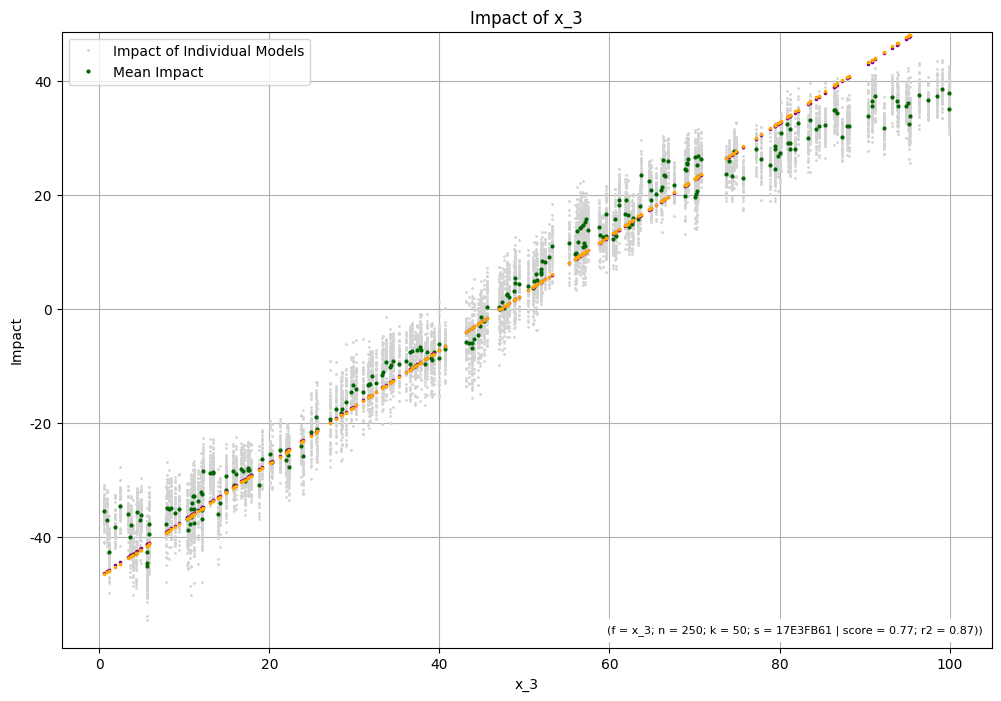

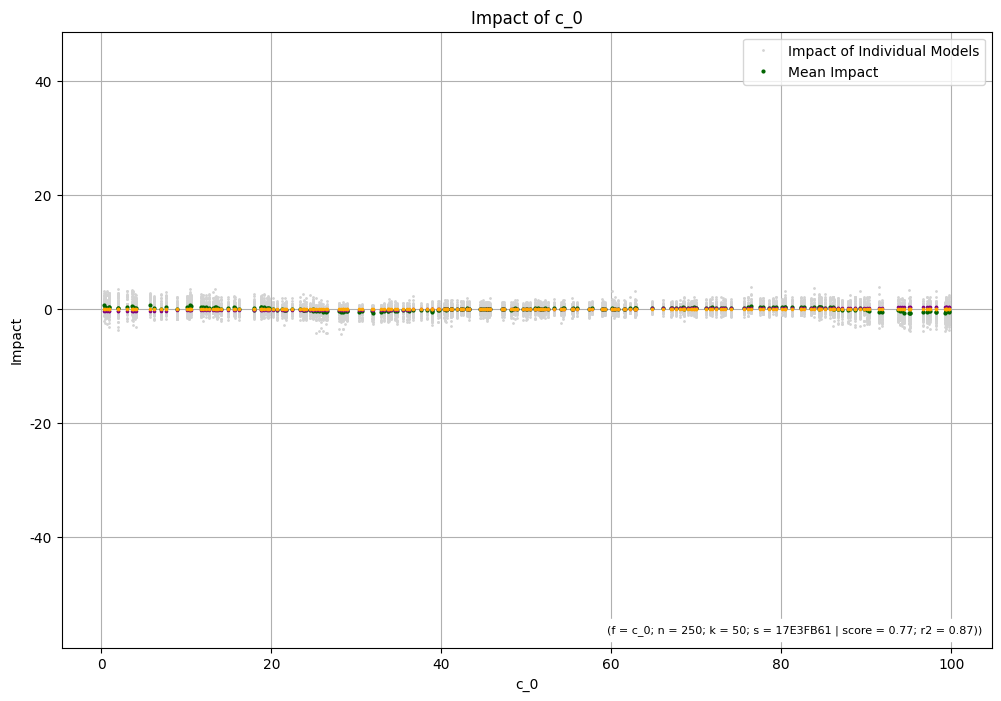

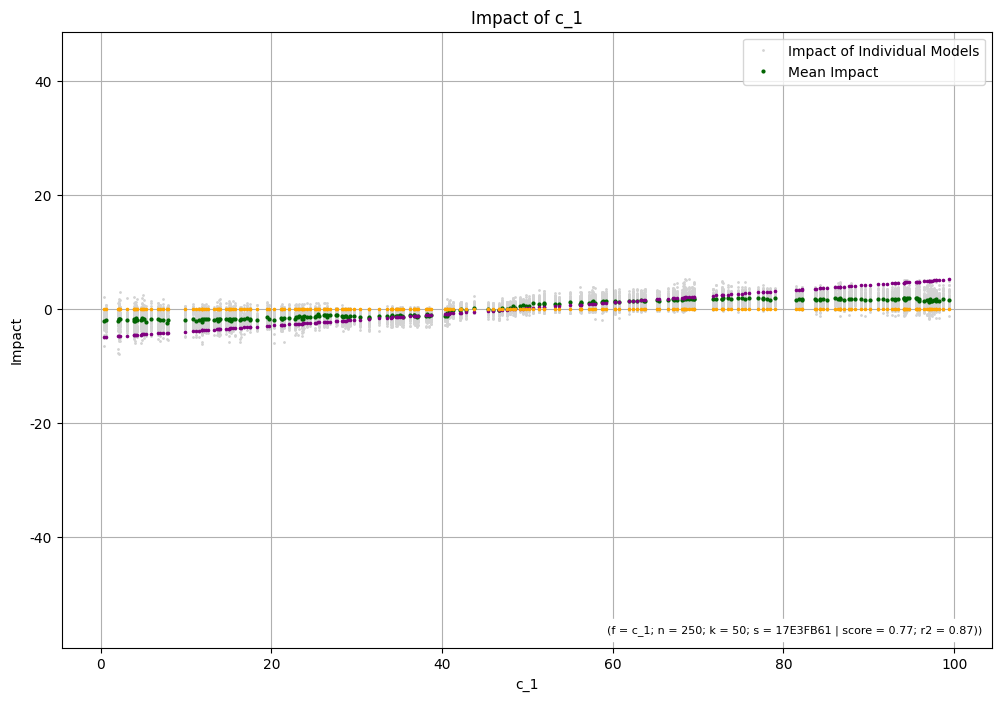

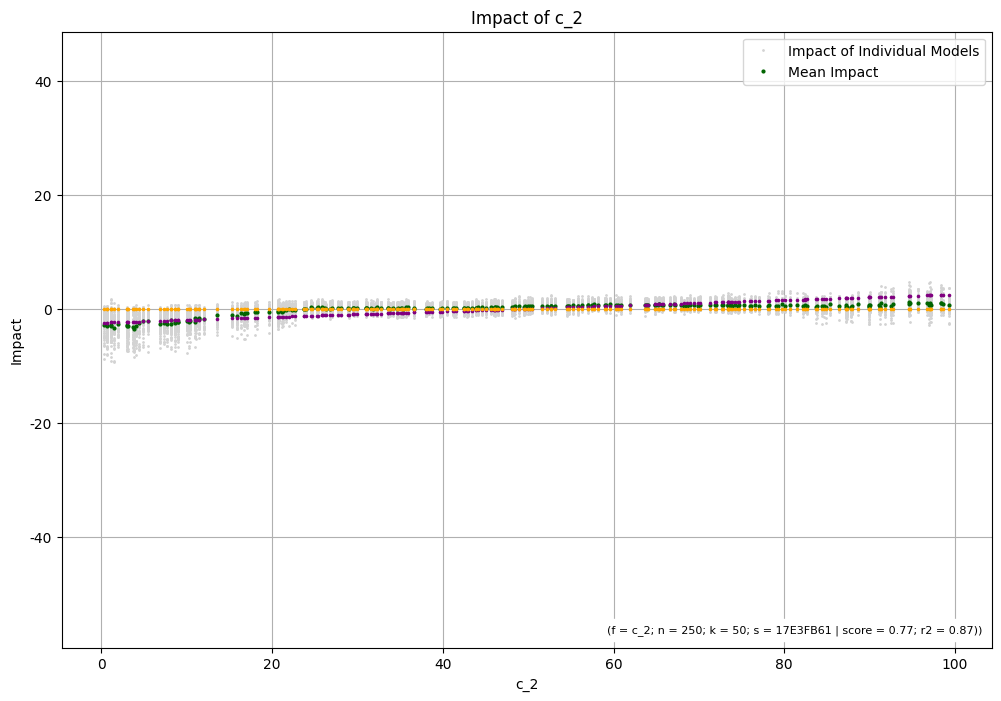

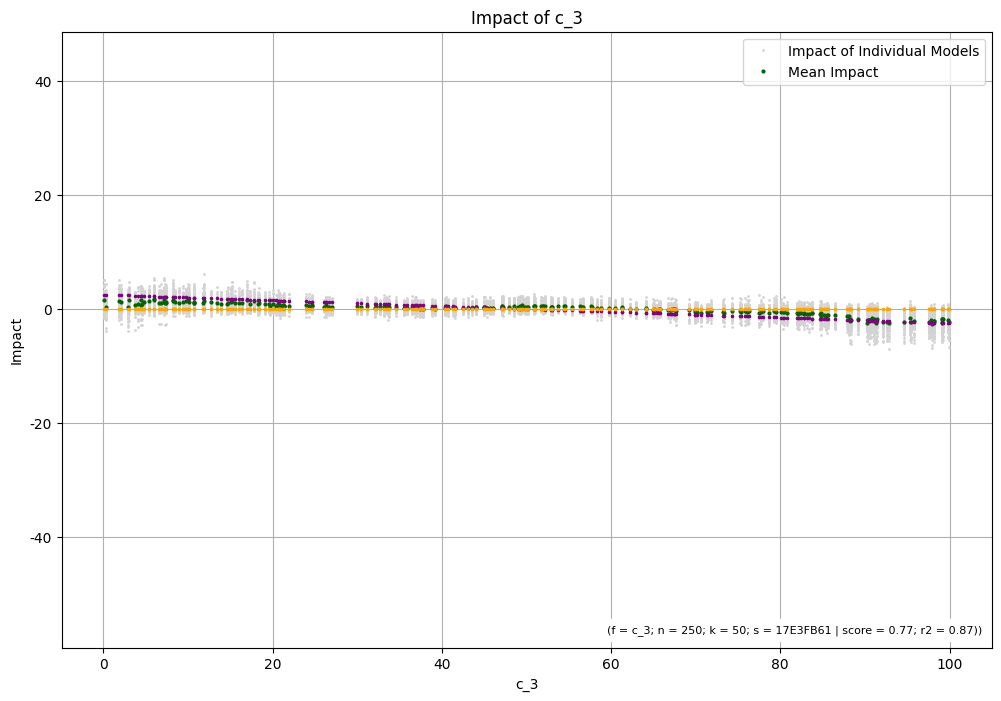

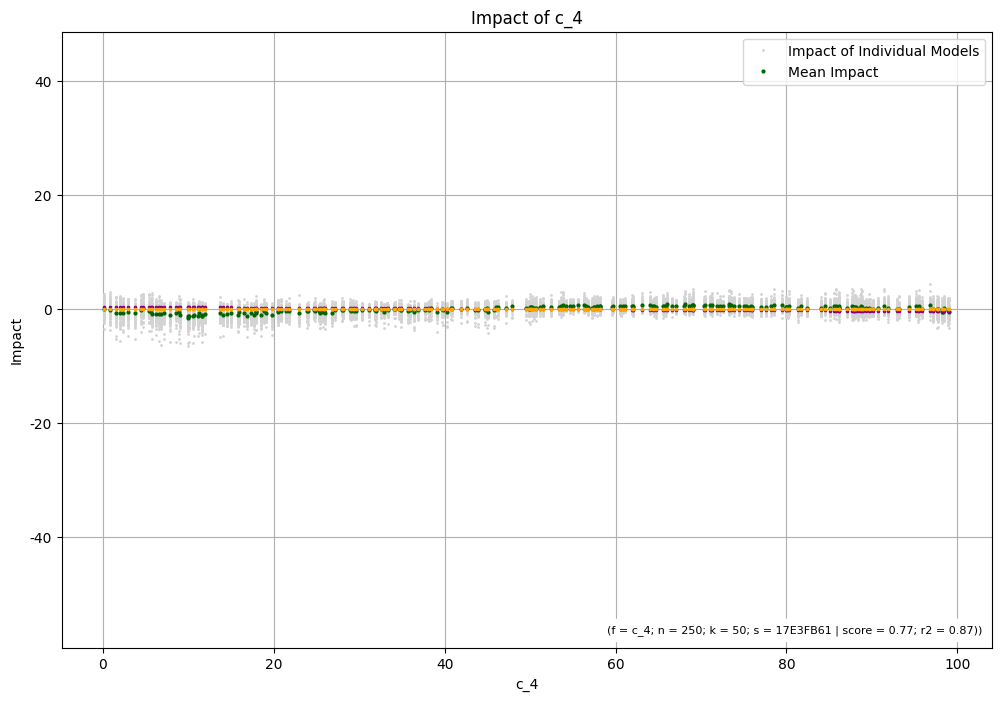

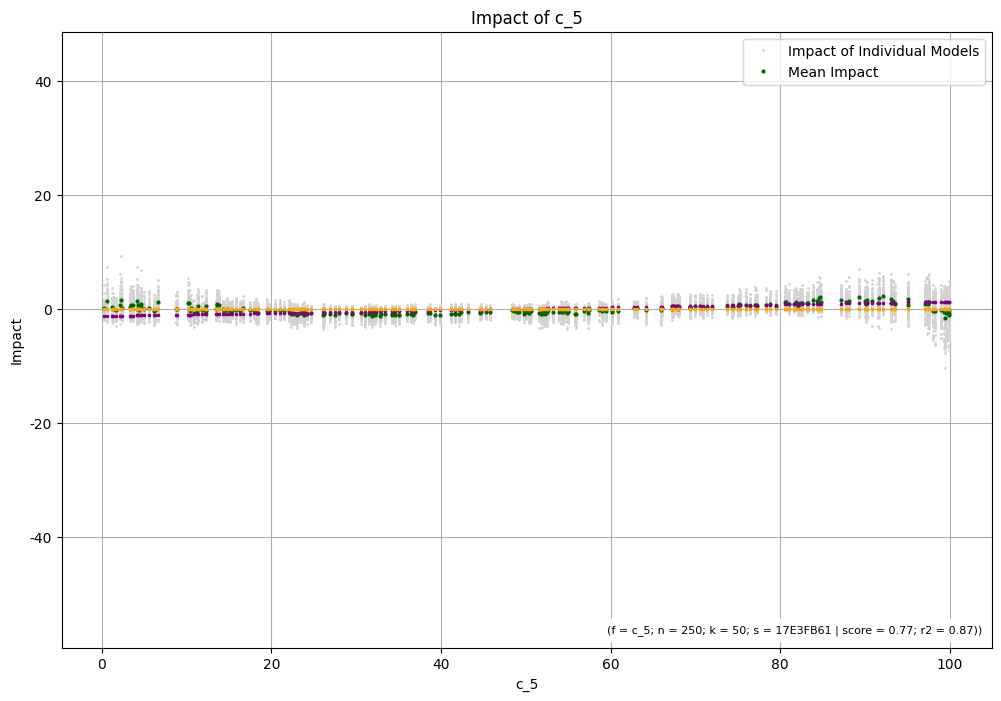

In [8]:
impact_charts = scenario.model_impact_charts(linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,c_0,c_1,c_2,c_3,c_4,c_5,mu_x_i,mu_c_i
0,RMSE,4.829581,1.992347,2.778115,4.696729,0.279422,1.546990,1.066175,1.019476,0.536467,0.802175,3.574193,0.875117
0,MAE,3.652858,1.561717,1.911938,3.430973,0.221537,1.473344,0.757194,0.803166,0.449687,0.677224,2.639372,0.730359
0,MED_AE,2.748128,1.244709,1.006148,2.566222,0.181760,1.605204,0.585107,0.577086,0.435714,0.628852,1.891302,0.668954
0,LR_RMSE,0.193839,1.605079,0.141070,0.166386,0.177735,3.083029,1.386756,1.484304,0.218982,0.746713,0.526594,1.182920
0,LR_MAE,0.167966,1.400631,0.122606,0.142704,0.151771,2.710818,1.189025,1.281471,0.190793,0.642921,0.458477,1.027800
0,LR_MED_AE,0.161739,1.326537,0.117495,0.138102,0.149542,2.651247,1.157018,1.404079,0.189536,0.648771,0.435968,1.033365


In [10]:
scenario.linreg_r2(), scenario.model_r2()

(0.8390336092604342, 0.8724892804685669)

## A Multi-Scenario Experiment

In [11]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA, n=N)

In [12]:
df_model_errors = experiment.model_errors(linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


(0.0, 5.5)

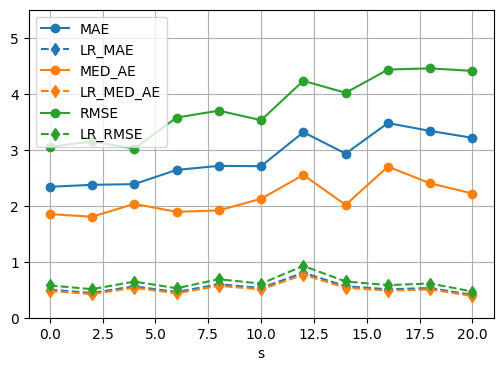

In [13]:
ax = experiment.plot_model_errors(x_col="s", y_col="mu_x_i", figsize=(6, 4))
ax.set_ylim(0.0, 5.5)

(0.0, 5.5)

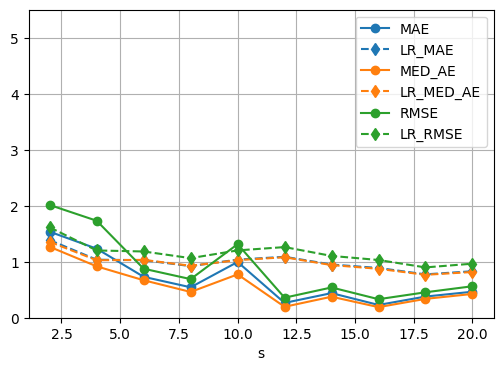

In [14]:
ax = experiment.plot_model_errors(x_col="s", y_col="mu_c_i", figsize=(6, 4))
ax.set_ylim(0.0, 5.5)

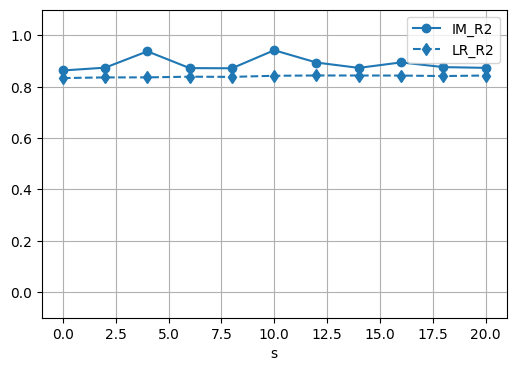

In [15]:
ax = experiment.plot_r2(x_col="s", figsize=(6, 4))